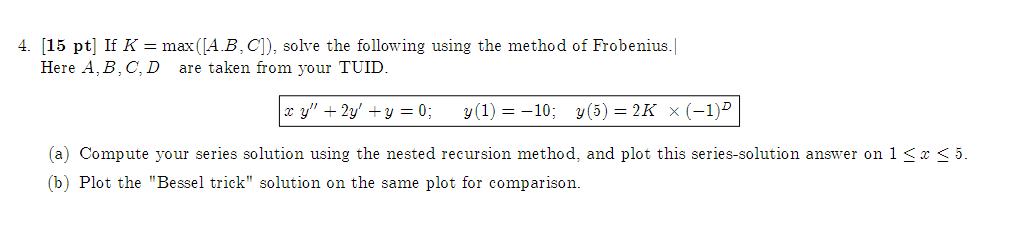

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define u1 and u2 as functions using Bessel functions
u1 = lambda x: 1/math.sqrt(x) * scipy.special.i0(2 * np.sqrt(x))
u2 = lambda x: 1/math.sqrt(x) * scipy.special.k0(2 * np.sqrt(x))

u1_values = [u1(1), u1(5)]
u2_values = [u2(1), u2(5)]

# Pre-compute the CC values since they are constants
CC = np.linalg.solve(np.array([[u1_values[0], u2_values[0]], [u1_values[1], u2_values[1]]]), np.array([-10, -18]))

def bessel_trick(x):
    # Use the pre-computed CC values
    return CC[0] * u1(x) + CC[1] * u2(x)  

def series(x, N=100):
    """Calculate the series solution up to N terms."""
    c = [0] * (N+1)  # List to store coefficients c_k
    cp = [0] * (N+1)  # List to store coefficients c'_k
    
    # Compute the coefficients using the given recursion relations
    for k in range(1, N+1):
        if k == 1:
            c[k] = -c[k-1] / (2 * k)
        else:
            c[k] = -c[k-1] / ((k) * (k-1) * (2*k))
        if k > 2:  # Fixed condition to avoid division by zero
            cp[k] = -cp[k-1] / ((k-1) * (k-2) * (2*k-2))
    
    # Evaluate the series solution using the coefficients
    y_val = sum([c[k] * x**k for k in range(N+1)]) + sum([cp[k] * (x**(k-1)) for k in range(2, N+1)])  # Start sum from k=2 for cp
    
    return y_val

# Define the x values for plotting
x = np.linspace(1, 5, 400)

y_vals_series = [series(val) for val in x]
y_vals_bessel = [bessel_trick(val) for val in x]

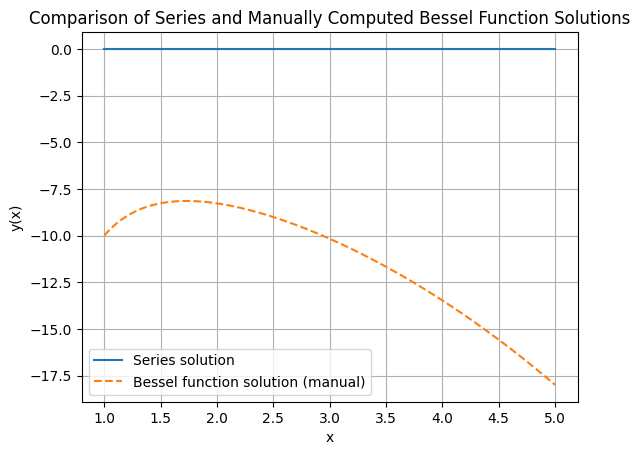

In [25]:
# Plot the solutions
plt.plot(x, y_vals_series, label="Series solution")
plt.plot(x, y_vals_bessel, label="Bessel function solution (manual)", linestyle='--')
plt.title("Comparison of Series and Manually Computed Bessel Function Solutions")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid(True)
plt.show()